## İsmail Tunç 150200306

# Final Exam - Computer Assignment

### Generating Data Sets D1 and D2 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# D1: Linearly separable data
X1, y1 = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2, random_state=42)
# splitting into train and test sets(10 of them for each class) 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, stratify=y1, random_state=42)

# D2: Linearly non-separable data
X2, y2 = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.5, random_state=42)
# splitting into train and test sets(10 of them for each class) 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, stratify=y2, random_state=42)

### Question 4: Plotting the data points in D1 and in D2

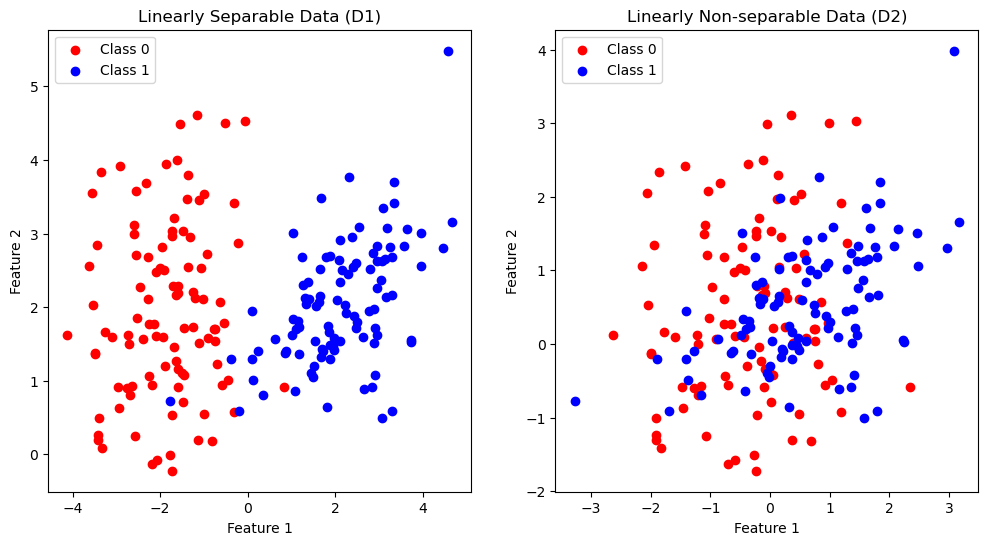

In [2]:
# D1
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X1[y1 == 0][:, 0], X1[y1 == 0][:, 1], color='red', label='Class 0')
plt.scatter(X1[y1 == 1][:, 0], X1[y1 == 1][:, 1], color='blue', label='Class 1')
plt.title('Linearly Separable Data (D1)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# D2
plt.subplot(1, 2, 2)
plt.scatter(X2[y2 == 0][:, 0], X2[y2 == 0][:, 1], color='red', label='Class 0')
plt.scatter(X2[y2 == 1][:, 0], X2[y2 == 1][:, 1], color='blue', label='Class 1')
plt.title('Linearly Non-separable Data (D2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.show()

### Question 5: Implementation and Evaluation of Hard-Margin SVM

In [10]:
# hard-margin SVM for D1
hard_margin_svm = SVC(kernel='linear', C=1e10)
hard_margin_svm.fit(X1_train, y1_train)

# predictions for T1
y1_pred_train = hard_margin_svm.predict(X1_train)
y1_pred_test = hard_margin_svm.predict(X1_test)

# accuracy 
accuracy_train_T1 = accuracy_score(y1_train, y1_pred_train)
accuracy_test_T1 = accuracy_score(y1_test, y1_pred_test)

(accuracy_train_T1, accuracy_test_T1)

(0.9722222222222222, 1.0)

*Comment: It is simple and easy to separate because of the distribution of the data points. It's linearly separable.*

### Question 6: Implementation and Evaluation of Soft-Margin SVM

In [11]:
# soft-margin SVM for D2
soft_margin_svm = SVC(kernel='linear', C=1.0)
soft_margin_svm.fit(X2_train, y2_train)

# predictions for T2
y2_pred_train = soft_margin_svm.predict(X2_train)
y2_pred_test = soft_margin_svm.predict(X2_test)

# accuracy values
accuracy_train_T2 = accuracy_score(y2_train, y2_pred_train)
accuracy_test_T2 = accuracy_score(y2_test, y2_pred_test)

(accuracy_train_T2, accuracy_test_T2)

(0.6777777777777778, 0.7)

*Comment: It is not as simple as linearly separable one because of the distribution of the data points. I used C=1 for soft-margin.*

### Question 7: Implementation and Evaluation of a Two-Layer MLP

In [5]:
# MLP for D1
mlp_d1 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp_d1.fit(X1_train, y1_train)

# predictions for D1
y1_pred_train_mlp = mlp_d1.predict(X1_train)
y1_pred_test_mlp = mlp_d1.predict(X1_test)

# accuracy for D1
accuracy_train_d1_mlp = accuracy_score(y1_train, y1_pred_train_mlp)
accuracy_test_d1_mlp = accuracy_score(y1_test, y1_pred_test_mlp)

# MLP for D2
mlp_d2 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp_d2.fit(X2_train, y2_train)

# predictions for D2
y2_pred_train_mlp = mlp_d2.predict(X2_train)
y2_pred_test_mlp = mlp_d2.predict(X2_test)

# accuracy for D2
accuracy_train_d2_mlp = accuracy_score(y2_train, y2_pred_train_mlp)
accuracy_test_d2_mlp = accuracy_score(y2_test, y2_pred_test_mlp)

(accuracy_train_d1_mlp, accuracy_test_d1_mlp), (accuracy_train_d2_mlp, accuracy_test_d2_mlp)

((0.9777777777777777, 1.0), (0.7333333333333333, 0.75))

### Comparison and Comments:

In [6]:
print("### Hard-Margin SVM Results for D1 ###")
print(f"Training Accuracy: {accuracy_train_T1 * 100:.2f}%")
print(f"Test Accuracy (T1): {accuracy_test_T1 * 100:.2f}%")

print("\n### Soft-Margin SVM Results for D2 ###")
print(f"Training Accuracy: {accuracy_train_T2 * 100:.2f}%")
print(f"Test Accuracy (T2): {accuracy_test_T2 * 100:.2f}%")

print("\n### Two-Layer MLP Results ###")
print("\nFor D1 (Linearly Separable Data):")
print(f"Training Accuracy: {accuracy_train_d1_mlp * 100:.2f}%")
print(f"Test Accuracy (T1): {accuracy_test_d1_mlp * 100:.2f}%")

print("\nFor D2 (Linearly Non-separable Data):")
print(f"Training Accuracy: {accuracy_train_d2_mlp * 100:.2f}%")
print(f"Test Accuracy (T2): {accuracy_test_d2_mlp * 100:.2f}%")

### Hard-Margin SVM Results for D1 ###
Training Accuracy: 97.22%
Test Accuracy (T1): 100.00%

### Soft-Margin SVM Results for D2 ###
Training Accuracy: 67.78%
Test Accuracy (T2): 70.00%

### Two-Layer MLP Results ###

For D1 (Linearly Separable Data):
Training Accuracy: 97.78%
Test Accuracy (T1): 100.00%

For D2 (Linearly Non-separable Data):
Training Accuracy: 73.33%
Test Accuracy (T2): 75.00%


- Hard-Margin SVM (D1): Achieved high accuracy for both training and test sets, indicating it effectively handled the linearly separable data.

- Soft-Margin SVM (D2): Performed moderately on the non-separable data, with lower accuracy compared to the linear case.

- MLP (D1): Also achieved high accuracy, comparable to the hard-margin SVM, confirming its capability to classify linearly separable data effectively.

- MLP (D2): Outperformed the soft-margin SVM on non-separable data, showing better generalization.

**The MLP's superior performance on D2 suggests that its non-linear decision boundaries provide an advantage in handling non-separable data, whereas the SVM struggled due to its linear nature. For linearly separable data, both methods performed excellently.**